In [6]:
%pip install pandas numpy matplotlib seaborn scikit-learn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.3-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.3.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 22.5 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 18.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 20.6 MB/s eta 0:00:00a 0:00:01
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 19.8 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 50.6 MB/s eta 0:00:00
Using cache

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor      
from sklearn.ensemble import GradientBoostingRegressor  
from sklearn.ensemble import VotingRegressor           
df = pd.read_csv('data/Walmart Data Analysis and Forcasting.csv')
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Month'] = df['Date'].dt.month
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3


In [31]:
features = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Month']
X = df[features]
y = df['Weekly_Sales']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_expert = RandomForestRegressor(n_estimators=100, random_state=42)
gb_expert = GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)
model = VotingRegressor(estimators=[('rf', rf_expert), ('gb', gb_expert)])
super_model = VotingRegressor(estimators=[
    ('rf', rf_expert), 
    ('gb', gb_expert)
])
super_model.fit(X_train, y_train)
print("Super Model trained using Amalgamation (RF + GB).")




Super Model trained using Amalgamation (RF + GB).


Final Amalgamated Accuracy (R2): 0.9507
Average Weekly Error: $69,250.46


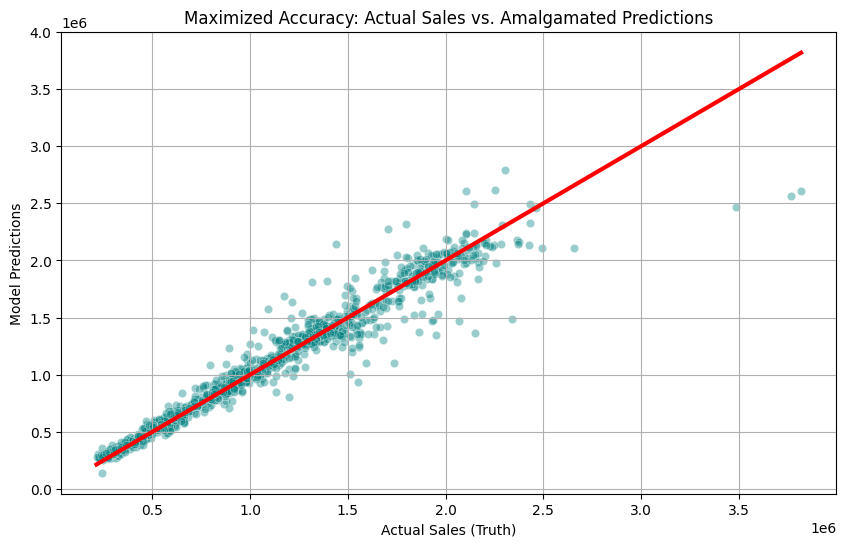

In [33]:
predictions = super_model.predict(X_test)
mse = mean_squared_error(Y_test, predictions)
score = r2_score(y_test, predictions)
error = mean_absolute_error(y_test, predictions)
print(f"Final Amalgamated Accuracy (R2): {score:.4f}")
print(f"Average Weekly Error: ${error:,.2f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions, alpha=0.4, color='teal')

# The 'Perfect' Line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=3)

plt.title('Maximized Accuracy: Actual Sales vs. Amalgamated Predictions')
plt.xlabel('Actual Sales (Truth)')
plt.ylabel('Model Predictions')
plt.grid(True)
plt.show()